In [48]:
from utils import Dataloader
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [49]:
def load_ratings(path):
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies(path):
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME, encoding = 'ISO-8859-1' )
    return df

def load_users(path):
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

In [50]:
#데이터 폴더 경로
DIR_PATH = "./datasets/"

#데이터 호출
users_df = Dataloader.load_users(DIR_PATH)
ratings_df = Dataloader.load_ratings(DIR_PATH)
movies_df = Dataloader.load_movies(DIR_PATH)

In [51]:
print(users_df.head(3))
print(ratings_df.head(3))
print(movies_df.head(3))

   userId gender  age  Occupation zip_code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
   movieId                    title                        genres
0        1         Toy Story (1995)   Animation|Children's|Comedy
1        2           Jumanji (1995)  Adventure|Children's|Fantasy
2        3  Grumpier Old Men (1995)                Comedy|Romance


In [52]:
user_rating_df = pd.merge(users_df, ratings_df, on='userId')
user_movie_rating_df = pd.merge(user_rating_df, movies_df, on='movieId')

In [53]:
print(user_movie_rating_df.head(3))

   userId gender  age  Occupation zip_code  movieId  rating  timestamp  \
0       1      F    1          10    48067     1193       5  978300760   
1       2      M   56          16    70072     1193       5  978298413   
2      12      M   25          12    32793     1193       4  978220179   

                                    title genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  


In [54]:
user_movie_rating_df_top = user_movie_rating_df.copy()

user_movie_rating_df_top['genres'] = user_movie_rating_df['genres'].str.split('|')

user_movie_rating_df_top

user_movie_rating_expanded = user_movie_rating_df_top.explode('genres')
user_movie_rating_expanded

,userId,gender,age,Occupation,zip_code,movieId,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Western


In [59]:
def extract_year(title):
    return title.split('(')[-1][:-1]

# '년도' 컬럼 생성
user_movie_rating_expanded['year'] = user_movie_rating_expanded['title'].apply(extract_year)

In [56]:
age_gender_genre_rating = user_movie_rating_expanded.groupby(['age', 'gender', 'genres'])['rating'].mean().unstack()

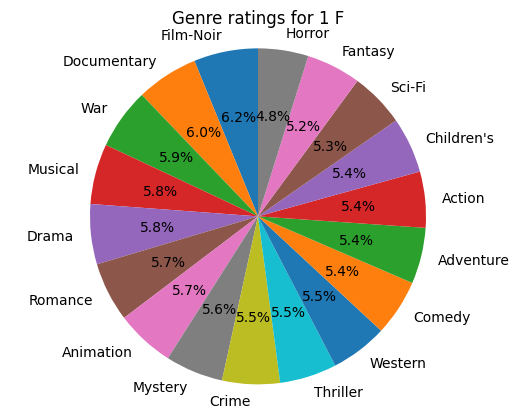

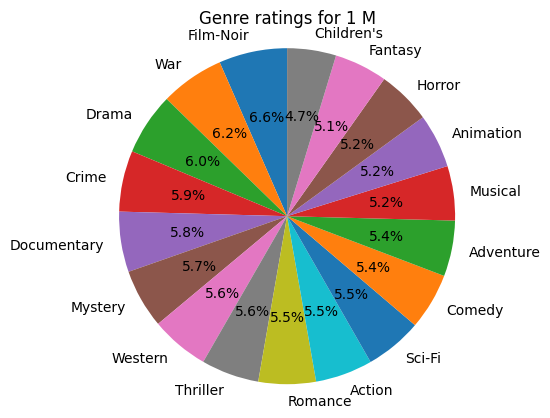

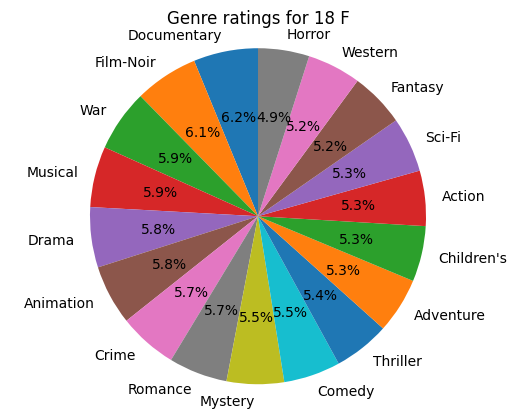

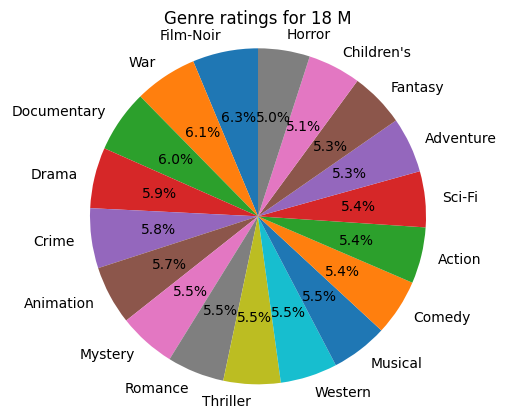

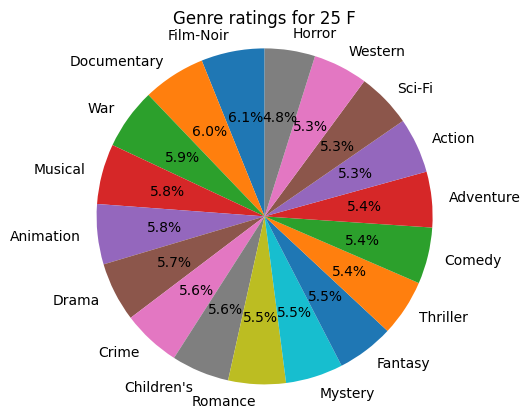

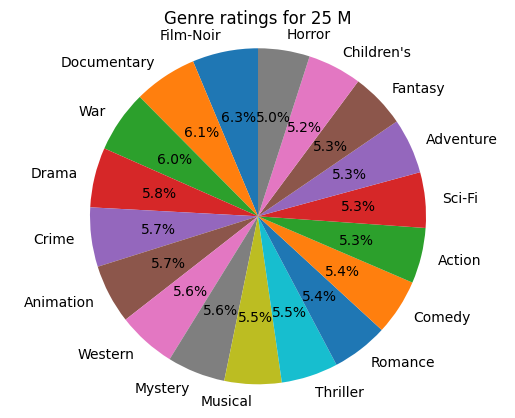

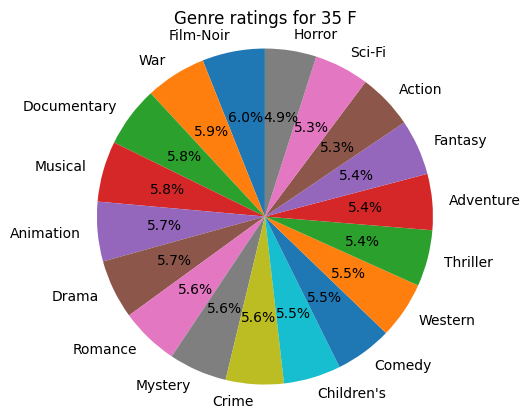

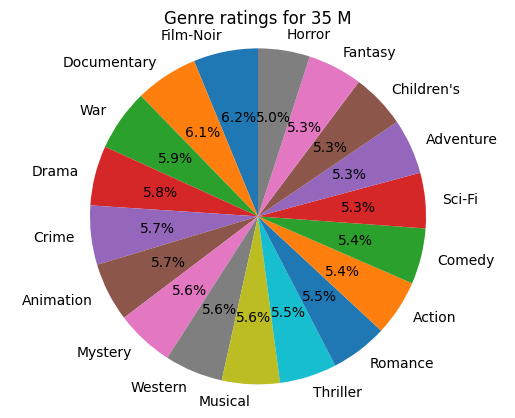

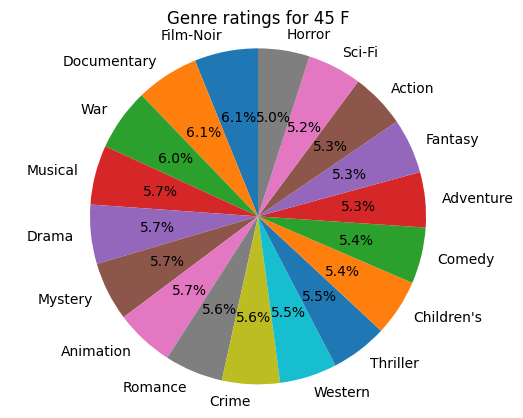

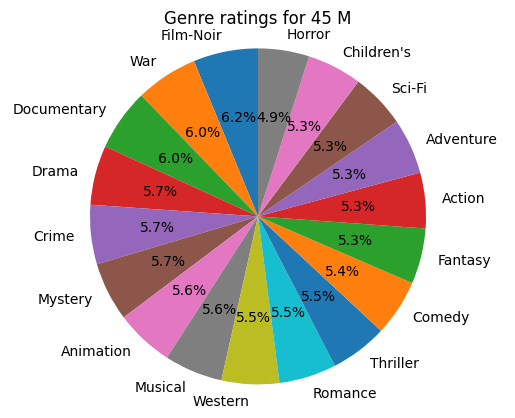

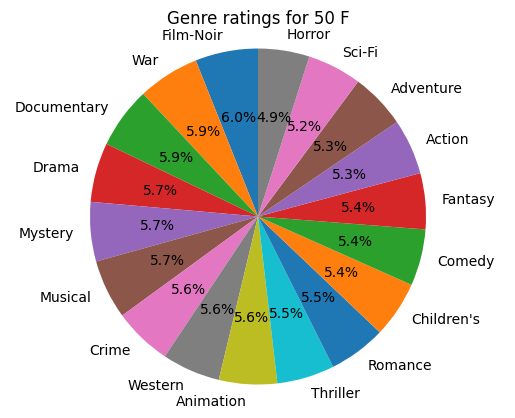

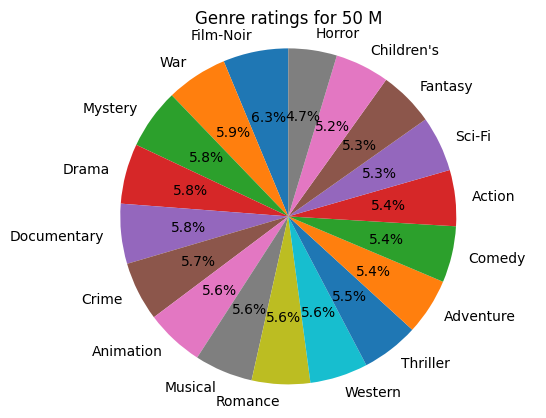

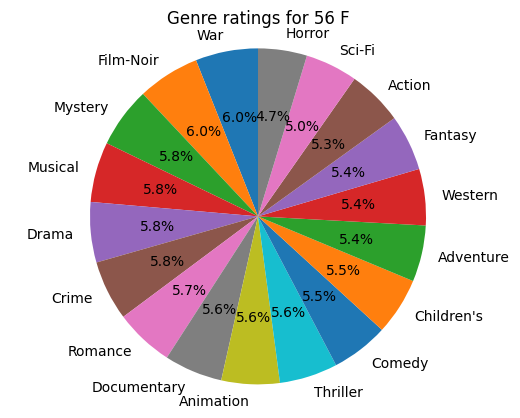

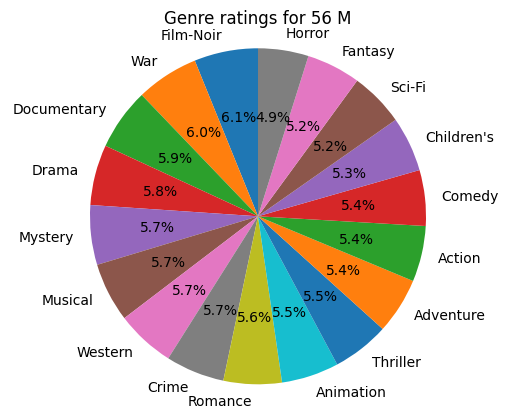

In [57]:
for age_gender, genre_ratings in age_gender_genre_rating.iterrows():
    age, gender = age_gender
    sorted_ratings = genre_ratings.sort_values(ascending=False)
    plt.pie(sorted_ratings, labels=sorted_ratings.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Genre ratings for {age} {gender}')
    plt.axis('equal')
    plt.show()

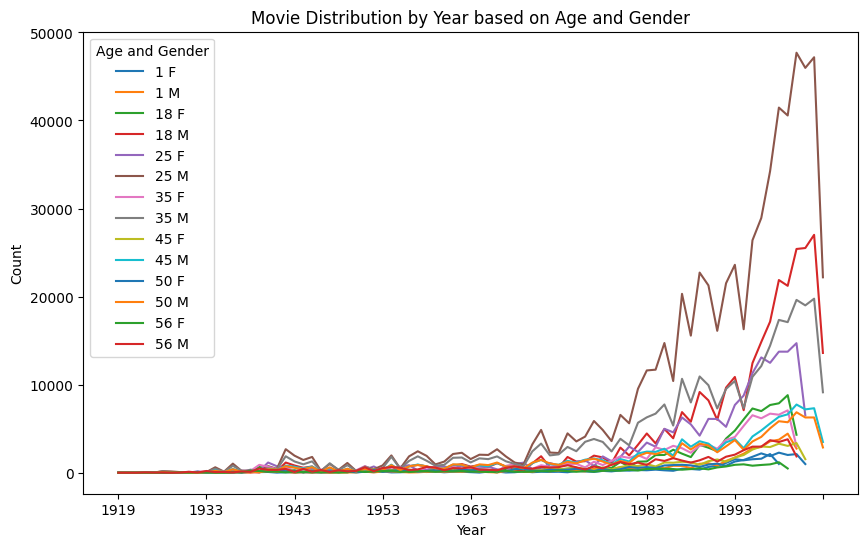

In [60]:
plt.figure(figsize=(10, 6))

for age, gender in user_movie_rating_expanded.groupby(['age', 'gender']):
    age_gender_df = gender.groupby('year').size()
    age_gender_df.plot(label=f'{age[0]} {age[1]}')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movie Distribution by Year based on Age and Gender')
plt.legend(title='Age and Gender')

plt.show()